## Foward Price Prediction Using Transformed DF Predicting P0

In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd
import os
import sys
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Get the directory of the current script
try:
    # This will work if the script is being run as a file
    current_dir = os.path.dirname(os.path.abspath(__file__))
except NameError:
    # Use the current working directory if __file__ is not defined
    current_dir = os.getcwd()

from build_a_pipeline import build_pipeline_P0_foward_price
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Flatten, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Flatten, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import TimeDistributed, Dense

In [2]:
x_train, x_val, X_test, y_train, y_val, y_test = build_pipeline_P0_foward_price(drop_features = False)

Document Performance of the Models

In [3]:
model_performance = []

In [4]:
x_val = x_val.sort_index(ascending=True)
y_val = y_val.sort_index(ascending=True)

## Ridge with Alpha 3

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score
import numpy as np

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score
import numpy as np

# Create a Ridge regression model
ridge_model = Ridge(alpha=3)  
ridge_model.fit(x_train, y_train)
y_pred = ridge_model.predict(x_val)
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

# Explained Variance Score
explained_variance = explained_variance_score(y_val, y_pred)

# Print the results
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')
print(f'Explained Variance Score: {explained_variance}')

model_performance.append({
    'Model': ridge_model,
    'Mean Squared Error': mse,
    'Root Mean Squared Error': rmse,
    'Mean Absolute Error': mae,
    'R-squared': r2,
    'Explained Variance Score': explained_variance
})




Mean Squared Error: 482.0962256023424
Root Mean Squared Error: 21.956689768777586
Mean Absolute Error: 19.253020365326396
R-squared: -6.453511502826097
Explained Variance Score: -0.914295640215286


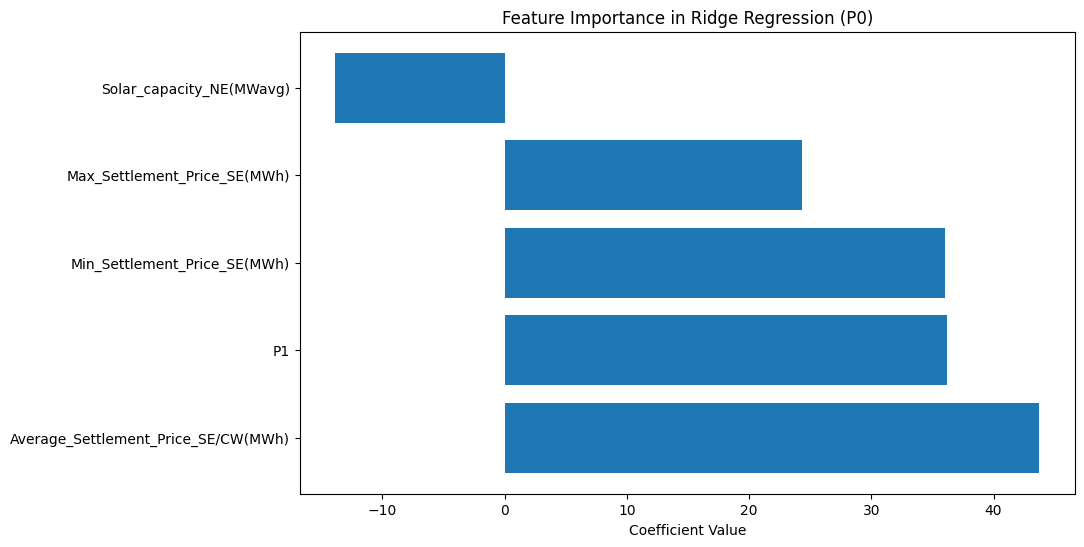

In [7]:
# Get the coefficients of the fitted model
coefficients = ridge_model.coef_

# Create a DataFrame to pair the feature names with their corresponding coefficients
coeff_df = pd.DataFrame({
    'Feature': x_train.columns,
    'Coefficient': coefficients
})

# Sort the coefficients by their absolute value to see the most influential features
coeff_df['AbsCoefficient'] = coeff_df['Coefficient'].abs()
sorted_coeff_df = coeff_df.sort_values(by='AbsCoefficient', ascending=False)
# Get the top 5 features with the highest absolute coefficients
sorted_coeff_df = sorted_coeff_df.head(5)
# Optional: Plot the feature importance
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(sorted_coeff_df['Feature'], sorted_coeff_df['Coefficient'])
plt.xlabel('Coefficient Value')
plt.title('Feature Importance in Ridge Regression (P0)')
plt.show()

## Ridge, Low Alpha

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score
import numpy as np

# Create a Ridge regression model
ridge_model = Ridge(alpha=0.1)  
ridge_model.fit(x_train, y_train)
y_pred = ridge_model.predict(x_val)
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

# Explained Variance Score
explained_variance = explained_variance_score(y_val, y_pred)

# Print the results
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')
print(f'Explained Variance Score: {explained_variance}')

model_performance.append({
    'Model': ridge_model,
    'Mean Squared Error': mse,
    'Root Mean Squared Error': rmse,
    'Mean Absolute Error': mae,
    'R-squared': r2,
    'Explained Variance Score': explained_variance
})



Mean Squared Error: 1278.7297447972733
Root Mean Squared Error: 35.75933087737064
Mean Absolute Error: 31.7147417464363
R-squared: -18.769967810770694
Explained Variance Score: -3.311783057544088


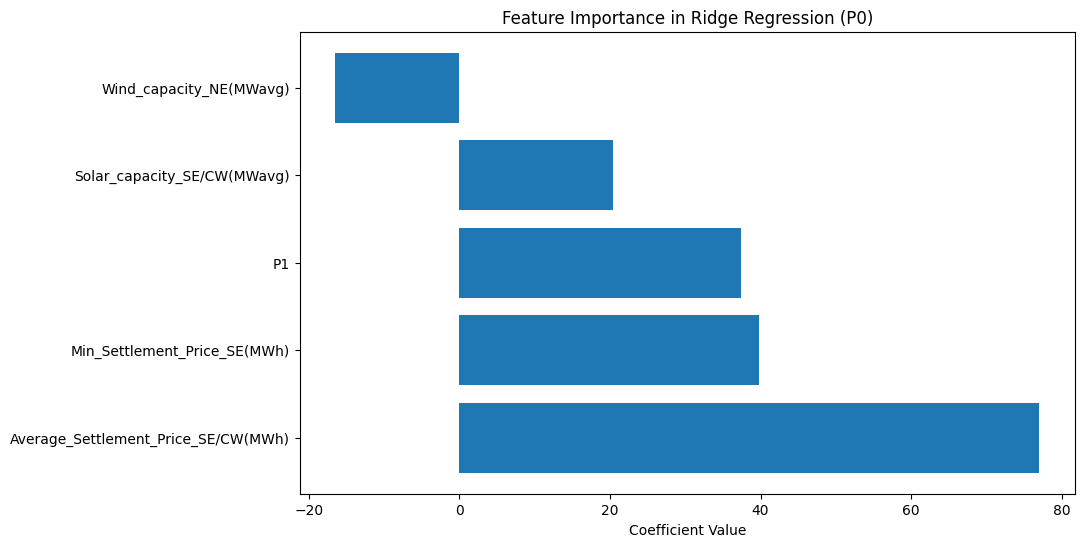

In [9]:
# Get the coefficients of the fitted model
coefficients = ridge_model.coef_

# Create a DataFrame to pair the feature names with their corresponding coefficients
coeff_df = pd.DataFrame({
    'Feature': x_train.columns,
    'Coefficient': coefficients
})

# Sort the coefficients by their absolute value to see the most influential features
coeff_df['AbsCoefficient'] = coeff_df['Coefficient'].abs()
sorted_coeff_df = coeff_df.sort_values(by='AbsCoefficient', ascending=False)
# Get the top 5 features with the highest absolute coefficients
sorted_coeff_df = sorted_coeff_df.head(5)
# Optional: Plot the feature importance
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(sorted_coeff_df['Feature'], sorted_coeff_df['Coefficient'])
plt.xlabel('Coefficient Value')
plt.title('Feature Importance in Ridge Regression (P0)')
plt.show()

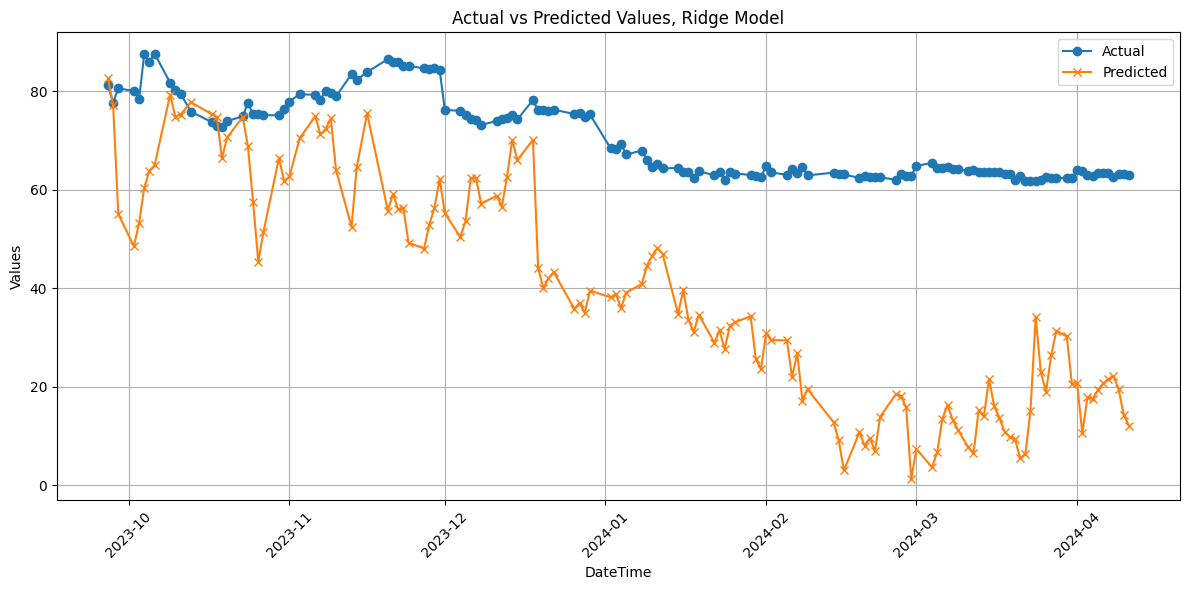

In [10]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Plotting y_actual vs y_pred
plt.figure(figsize=(12, 6))
plt.plot(x_val.index, y_val, label='Actual', marker='o')
plt.plot(x_val.index, y_pred, label='Predicted', marker='x')
plt.title('Actual vs Predicted Values, Ridge Model')
plt.xlabel('DateTime')
plt.ylabel('Values')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45)

plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

## Lasso with Low Alpha

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score
import numpy as np

lasso_model = Lasso(alpha=0.1)  # You can adjust the alpha parameter for regularization
lasso_model.fit(x_train, y_train)
y_pred = lasso_model.predict(x_val)
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)
explained_variance = explained_variance_score(y_val, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')
print(f'Explained Variance Score: {explained_variance}')

model_performance.append({
    'Model': lasso_model,
    'Mean Squared Error': mse,
    'Root Mean Squared Error': rmse,
    'Mean Absolute Error': mae,
    'R-squared': r2,
    'Explained Variance Score': explained_variance
})

Mean Squared Error: 419.1874030543128
Root Mean Squared Error: 20.474066597877247
Mean Absolute Error: 17.925609199938414
R-squared: -5.480901456138551
Explained Variance Score: -0.8756829487339177


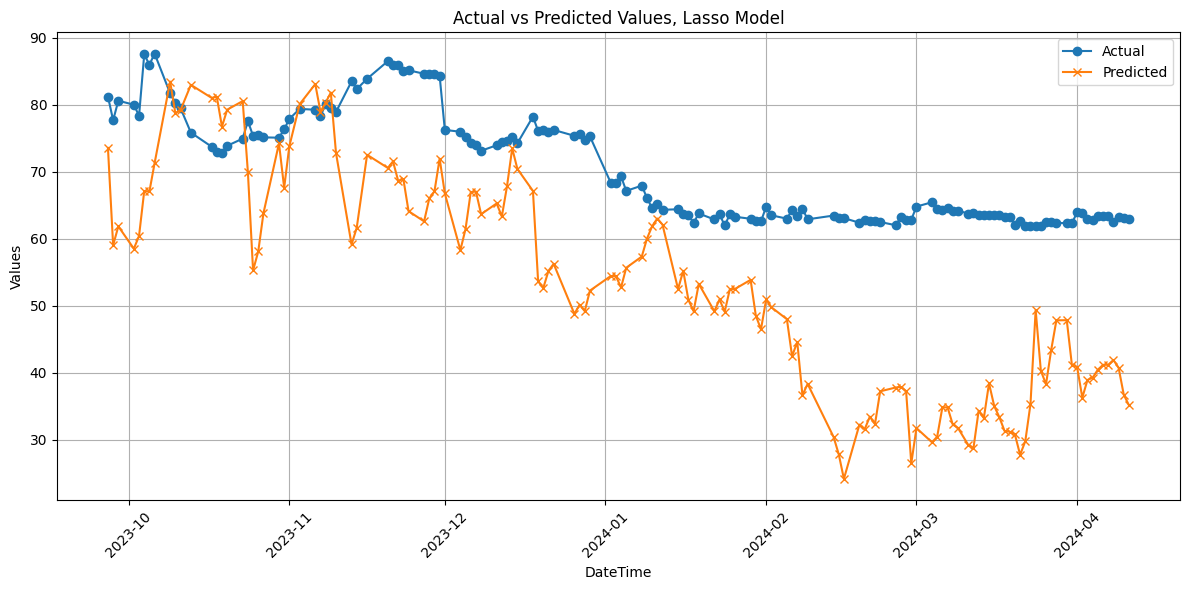

In [12]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Plotting y_actual vs y_pred
plt.figure(figsize=(12, 6))
plt.plot(x_val.index, y_val, label='Actual', marker='o')
plt.plot(x_val.index, y_pred, label='Predicted', marker='x')
plt.title('Actual vs Predicted Values, Lasso Model')
plt.xlabel('DateTime')
plt.ylabel('Values')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45)

plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

## Gradient Boosted

In [13]:
import xgboost as xgb
# Create XGBoost model
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100)
model.fit(x_train, y_train)

# Predictions and evaluation
y_pred = model.predict(x_val)
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')

# Predictions on validation data
y_pred = model.predict(x_val)
from sklearn.metrics import r2_score

# R-squared score
r2 = r2_score(y_val, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')

model_performance.append({
    'Model': model,
    'Mean Squared Error': mse,
    'Root Mean Squared Error': rmse,
    'R-squared': r2,
})

Mean Squared Error: 839.8558444916753
Root Mean Squared Error: 28.980266466885276
Mean Squared Error: 839.8558444916753
Root Mean Squared Error: 28.980266466885276
R-squared: -11.984700699146092


In [16]:
x_val.columns

Index(['P1', 'Average_Settlement_Price_SE/CW(MWh)',
       'Standard_Deviation_Settlement_Price_SE(MWh)',
       'Min_Settlement_Price_SE(MWh)', 'Max_Settlement_Price_SE(MWh)',
       'Hydro_Inflow_N(MWavg)', 'Hydro_Inflow_NE(MWavg)',
       'Hydro_Inflow_S(MWavg)', 'Hydro_Inflow_SE/CW(MWavg)',
       'Daily_Sum_Hydro_Inflow(MWavg)', 'Solar_Generated_Sum_NE(MWavg)',
       'Solar_Generated_Sum_SE/CW(MWavg)', 'Solar_Generated_Mean_NE(MWavg)',
       'Solar_Generated_Mean_SE/CW(MWavg)', 'Daily_Sum_Solar_Generated(MWavg)',
       'Wind_Generation_N(MWavg)', 'Wind_Generation_NE(MWavg)',
       'Wind_Generation_S(MWavg)', 'Wind_Generation_SUM(MWavg)',
       'Hydroelectric_capacity_NE(MWavg)', 'Hydroelectric_capacity_N(MWavg)',
       'Hydroelectric_capacity_SE/CW(MWavg)',
       'Hydroelectric_capacity_S(MWavg)', 'Thermal_capacity_NE(MWavg)',
       'Thermal_capacity_N(MWavg)', 'Thermal_capacity_SE/CW(MWavg)',
       'Thermal_capacity_S(MWavg)', 'Wind_capacity_NE(MWavg)',
       'Wind_capa

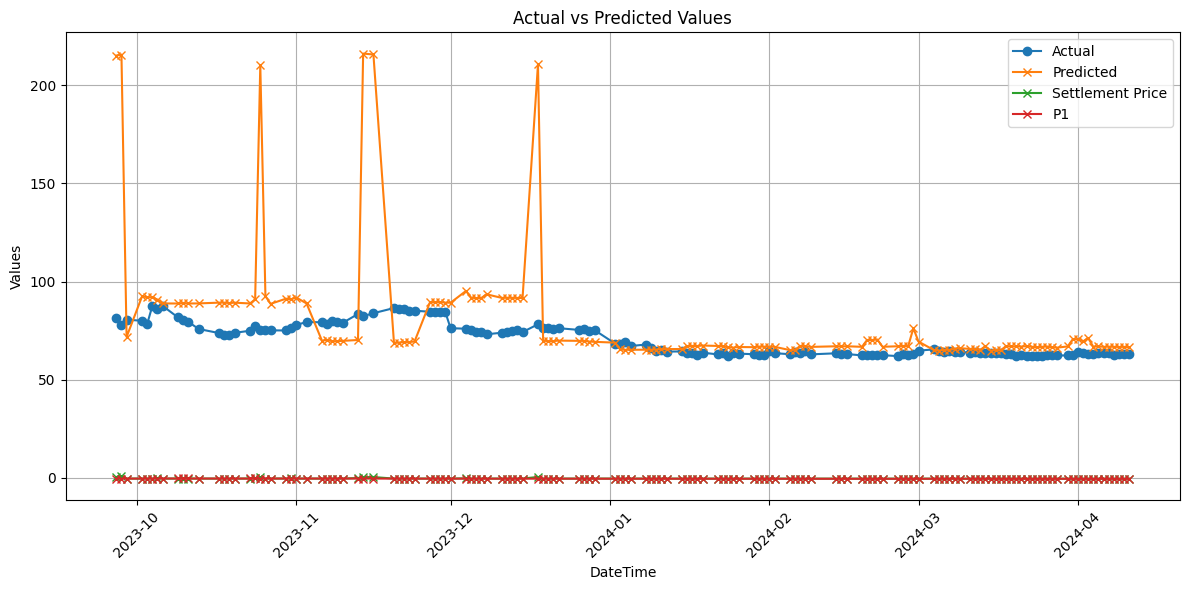

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Plotting y_actual vs y_pred
plt.figure(figsize=(12, 6))
plt.plot(x_val.index, y_val, label='Actual', marker='o')
plt.plot(x_val.index, y_pred, label='Predicted', marker='x')
plt.plot(x_val.index, x_val['Average_Settlement_Price_SE/CW(MWh)'], label='Settlement Price', marker='x')
plt.plot(x_val.index, x_val['P1'], label='P1', marker='x')
plt.plot(x_val.index, x_val['P1'], label='P1', marker='x')
plt.title('Actual vs Predicted Values')
plt.xlabel('DateTime')
plt.ylabel('Values')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

In [ ]:
performance_df = pd.DataFrame(model_performance)
performance_df = performance_df.sort_values(by='Mean Squared Error', ascending=True)
performance_df

,Model,Mean Squared Error,Root Mean Squared Error,Mean Absolute Error,R-squared,Explained Variance Score
3,"XGBRegressor(base_score=None, booster=None, ca...",33.495873,5.787562,NaN,0.998492,NaN
0,Ridge(alpha=3),235.000218,15.329717,10.653385,0.989422,0.989542
2,Lasso(alpha=0.1),254.398625,15.949879,10.816920,0.988548,0.988807
1,Ridge(alpha=0.1),263.919207,16.245590,11.805137,0.988120,0.988494
